In [3]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data
# Reshape to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

c:\Users\negovin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9514 - loss: 0.1642 - val_accuracy: 0.9838 - val_loss: 0.0553
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9842 - loss: 0.0503 - val_accuracy: 0.9867 - val_loss: 0.0499
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9867 - val_loss: 0.0436
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9895 - val_loss: 0.0405
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.9933 - loss: 0.0195 - val_accuracy: 0.9917 - val_loss: 0.0345
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9915 - val_loss: 0.0352
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9875 - val_loss: 0.0470
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9969 - loss: 0.0097 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted digit: 2


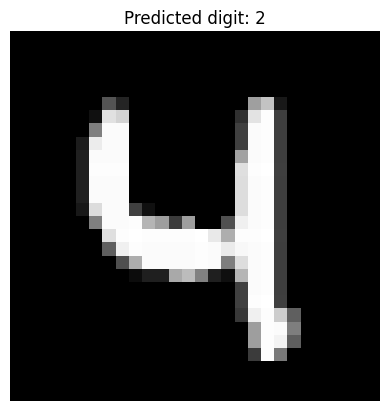

In [4]:
# Predict on a sample image
import numpy as np

sample_image = x_test[35].reshape(1,28,28,1)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)
print("Predicted digit:", predicted_class)

# Display the sample image
plt.imshow(x_test[3500].reshape(28,28), cmap='gray')
plt.title(f"Predicted digit: {predicted_class}")
plt.axis('off')
plt.show() 

In [5]:
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")


Model saved as mnist_cnn_model.h5


In [6]:
from tensorflow.keras.models import load_model

model = load_model("mnist_cnn_model.h5")
print("Model loaded successfully")


Model loaded successfully


In [7]:
from tensorflow.keras.models import load_model

model = load_model("mnist_cnn_model.h5")
print("Model loaded successfully")


Model loaded successfully


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


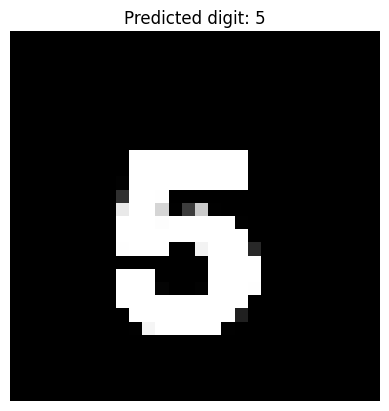

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load trained model
model = load_model("mnist_cnn_model.h5")

# Load PNG image
img = image.load_img(
    "five.png",
    color_mode="grayscale",
    target_size=(28, 28)
)

# Convert to array
img_array = image.img_to_array(img)

# Normalize and reshape
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

# Display result
plt.imshow(img, cmap="gray")
plt.title(f"Predicted digit: {predicted_digit}")
plt.axis("off")
plt.show()
